In [ ]:
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import matplotlib
font = {
        'weight' : 'bold',
        'size'   : 27}

matplotlib.rc('font', **font)
import h5py
import plotly.graph_objs as go
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
import pandas as pd
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]
store_path = rf"H:\phd stuff\tidy3d\output\3D SHU\08_21_2024 T(L) Analysis eps 50"

In [3]:
a=5/3
slices = np.array([0.1,0.3,0.5,0.9,1.0,1.2,1.5,2,3,5,8,12,15,18])*a


In [4]:
def Td(L,T0,xi,l:float=1.12):
    Db = 1+2*3.25/xi
    Td = (1+3.25)*(l/Db)/xi *np.exp(-L/xi)
    return T0*Td

def Tb(L,l):
    return np.exp(-L/l) 

In [5]:

# #Convergence
# for path_direction in [
#                        rf"H:\phd stuff\tidy3d\data\08_21_2024 RCP Slices Perm 50\z_incidence"
                      
#                        ]:

#       folder_path = f"{path_direction}"


      
#       for i,filename in enumerate(natsorted(os.listdir(folder_path))):
#             print(filename)
            
#             if not Path(filename).suffix==".txt":
#                   continue

            
#             if os.path.isfile(os.path.join(folder_path, filename)):
#                 file=os.path.join(folder_path, filename)
#                 structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
#                 print(structure_1.__str__())
#                 sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
#                 transmission0 = sim_data0['flux1'].flux
#                 transmission = sim_data['flux1'].flux
#                 transmission0_2 = sim_data0['flux2'].flux
#                 transmission_2 = sim_data['flux2'].flux
#                 transmission_normalized_1 = transmission / transmission0
#                 transmission_normalized_2 = transmission_2 / transmission0_2
#                 monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
#                 plt.figure(figsize=(20, 10))
#                 plt.scatter(monitor_lambdas,transmission_normalized_1, label=f"Right Monitor")
#                 # plt.scatter(monitor_lambdas,transmission_normalized_2, label=f"Left Monitor")
#                 plt.xlabel(r'$\nu$')
#                 plt.ylabel('Transmission [%]')
#                 plt.legend()
#                 plt.grid()
#                 plt.yscale("log")
#                 plt.title(f"L={slices[i]/a}a")
#                 plt.show()

      
    
        


     

               



RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 0.1a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 0.3a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 0.5a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 0.8999999999999999a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 1.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 1.2a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 1.5a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 2.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 3.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 5.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 8.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 12.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 15.0a.txt
RCP perm 50 runtime 2.5e-11ps nu 0.09 - 0.41 Size - 18.0a.txt
Configured successfully.


15:48:41 W. Europe Standard Time WARNING: Structure at 'structures[1]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

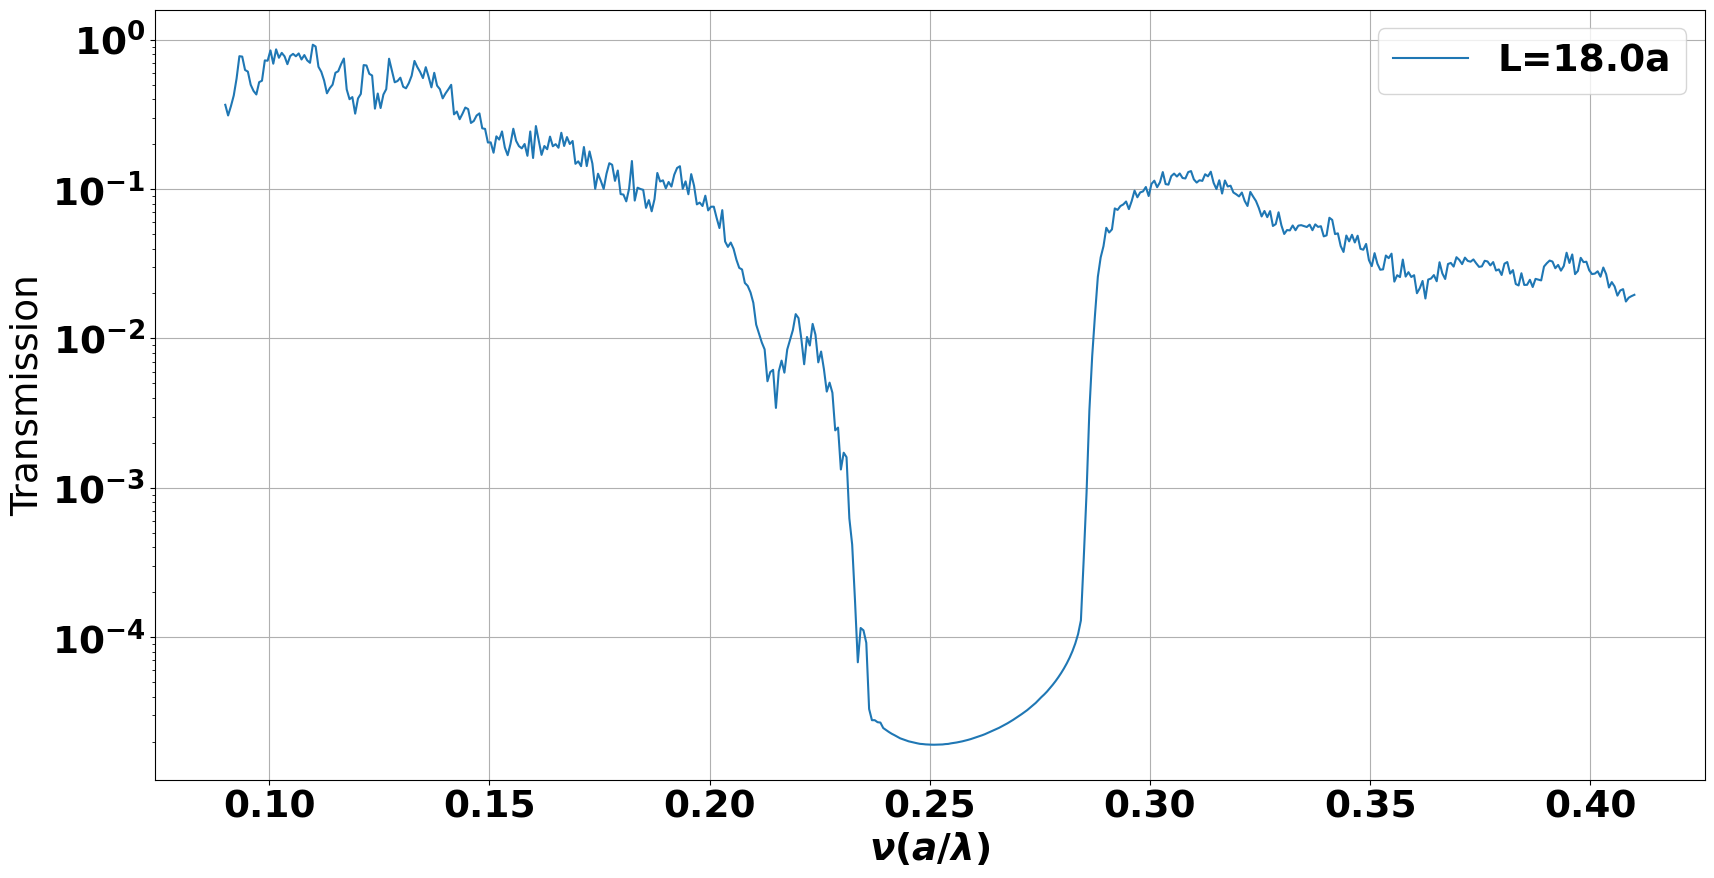

In [10]:

#Convergence
plt.figure(figsize=(20, 10))
for path_direction in [
                       rf"H:\phd stuff\tidy3d\data\08_21_2024 RCP Slices Perm 50\z_incidence"
                      
                       ]:

      folder_path = f"{path_direction}"


      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue

            if i <13:
                  continue
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                transmission0 = sim_data0['flux1'].flux
                transmission = sim_data['flux1'].flux
                transmission_normalized_1 = transmission / transmission0
                monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
                plt.plot(monitor_lambdas,transmission_normalized_1, label=f"L={slices[i]/a}a")

                
plt.xlabel(rf'$\nu (a/\lambda)$')
plt.ylabel('Transmission')
plt.legend()
plt.grid()
plt.yscale("log")
# plt.title(f"L={slices[i]/a}a")
plt.show()

      

In [7]:


# for path_direction in [
#                        r"H:\phd stuff\tidy3d\data\08_21_2024 RCP Slices Perm 50\z_incidence"
                      
#                        ]:

#       folder_path = f"{path_direction}"
#       plt.figure(figsize=(20, 10))


      
#       for i,filename in enumerate(natsorted(os.listdir(folder_path))):
#             print(filename)
            
#             if not Path(filename).suffix==".txt":
#                   continue

            
#             if os.path.isfile(os.path.join(folder_path, filename)):
#                 file=os.path.join(folder_path, filename)
#                 structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
#                 sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
#                 transmission0 = sim_data0['flux1'].flux
#                 transmission = sim_data['flux1'].flux
#                 transmission_normalized = transmission / transmission0
#                 monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
#                 plt.plot(monitor_lambdas,transmission_normalized, label=f"L={slices[i]/a}a")

#       #Save the plot in PDF format
#       if not os.path.exists(store_path):
#             os.makedirs(store_path)
#             print(f"Folder '{store_path}' created successfully.")
      
      
#       plt.xlabel(r'$\nu$')
#       plt.ylabel('Transmission [%]')
#       plt.legend()
#       plt.grid()
#       plt.yscale("log")
#       plt.title("Bandgap formation")
#       plt.show()

      
    
        


     

               



In [ ]:
#Calculate T(L) for given frequencies 

frequencies_check = np.array([0.21,0.232,0.26])
transmission_total_l= []
transmission_total= []
for path_direction in [
                       r"H:\phd stuff\tidy3d\data\08_21_2024 RCP Slices Perm 50\z_incidence"
                      
                       ]:

      folder_path = f"{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                transmission0 = sim_data0['flux1'].flux
                transmission = sim_data['flux1'].flux
                transmission_normalized = transmission / transmission0
                monitor_lambdas = td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs)
                reduced_freqs = a/monitor_lambdas
                indices = [np.argmin(np.abs(reduced_freqs-item)) for item in frequencies_check]
                transmission_total += [transmission_normalized]
                transmission_total_l +=  [transmission_normalized[indices]]

            


In [ ]:
# frequencies_check = np.array([0.21,0.232,0.26])
# indices = [np.argmin(np.abs(reduced_freqs-item)) for item in frequencies_check]
# transmission_total_l = [np.array(item[indices]) for item in transmission_total]

In [ ]:

frequencies_labels = np.array(["SAL","Near gap","PGB"])
l = [1.12,0.76,0.72]
xi = [8,3.6,5.1]
T0 = [1.,0.5,0.055]
z0 = 3.25


for j, nu in enumerate(frequencies_check):
    plt.figure(figsize=(20, 10))
    Ls = np.linspace(0.1,18,100)
    plt.plot(
             (np.array(slices/a)),
             (np.array(transmission_total_l)[:,j]), 
             "o",label="Simulations")
    
    plt.plot(
             (Ls),
             (np.exp(-Ls)/(l[j])),
             '--',
             color="red",label="Theory - Ballistic Component")
    
    plt.plot(
        (Ls),
        (Td(Ls,T0[j],xi[j],l[j])),
                 '--',color="green",label="Theory - Localized Component")

    #popt, pcov = curve_fit(lambda L, T0,xi: Td(L,T0,xi,l=l[j]),(np.array(slices)*18.01)[3:], (np.array(transmission_total_l)[:,j])[3:])

    
    
    plt.title(f'$\\nu$={nu} - {frequencies_labels[j]}')
    plt.ylabel("T(L)")
    plt.xlabel("Slab Thickness L/a")
    plt.grid()
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    plt.ylim(1e-3,2)

    if not os.path.exists(store_path):
            os.makedirs(store_path)
            print(f"Folder '{store_path}' created successfully.")
      
      

    # plt.savefig(f'{store_path}/T(L)_Monitor_Right_nu_{nu}-{frequencies_labels[j]}.pdf', format='pdf')
    plt.show()